# Modelo de classificação para doenças coronárias

Este projeto tem como objetivo a criação de um modelo de classificação otimizado pelo F1-score, para a classificação se pacientes tem ou não doenças coronárias (do coração), agilizando a triagem e o encaminhamento mais rápido para um especialista.  
O dataset é público e se encontra disponível no Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci), contando com 13 features e 1 label.

## Labelização:
- age: Idade (Anos)  
- sex: Sexo (1 = Masc e 0 = Fem)  
- cp: Nível de dor ( 1 a 4 )  
- trestbps: Pressão sanguínea em Repouso  
- chol: colesterol em mg/dl:   
- fbs: Fasting Blood Sugar (Teste diabético) > 120 mg/dl  
- restecg: Eletrocardiogramas em repouso (0,1 ou 2)  
- thalach: Ritmo cardíaco  
- exang: Exercício físico que gerou Angina  
- oldpeak: Depressão de ST induzida por exercício em relação ao repouso  
- slope: Tipo de inclinação do segmento ST de pico do exercício  
- ca:  número  de  vasos  sanguínios  ressaltados  (coloridos  por fluoroscopia)  
- thal: Talassemia -> 3 = normal; 6 = fixed defect; 7 = reversable defect  
- target: alvo; 1 = doente, 0 = não doente.

## Import das bibliotecas

In [34]:
# dataset e gráficos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

## Import do dataset e primeiras análises

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe(percentiles=(0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,35.000000,0.000000,0.000000,100.000000,149.000000,0.000000,0.000000,95.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
10%,42.000000,0.000000,0.000000,110.000000,188.000000,0.000000,0.000000,116.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
90%,66.000000,1.000000,2.000000,152.000000,308.800000,1.000000,1.000000,176.600000,1.000000,2.800000,2.000000,2.000000,3.000000,1.000000


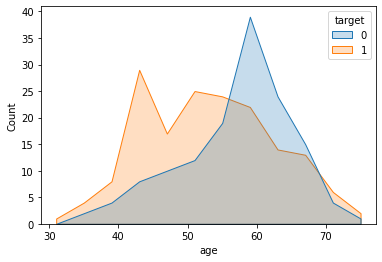

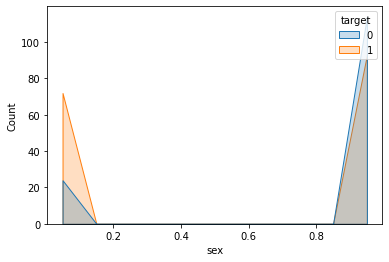

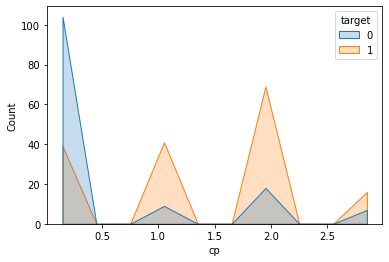

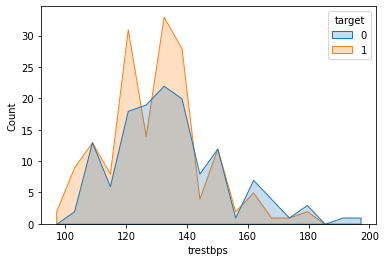

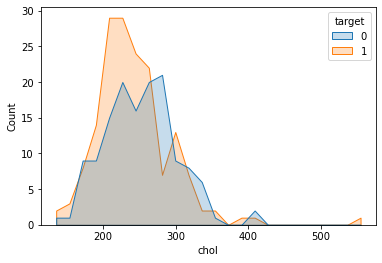

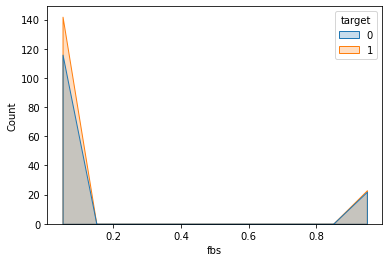

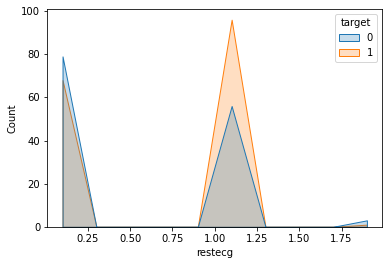

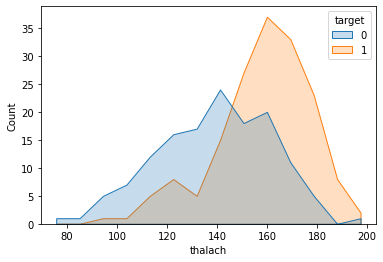

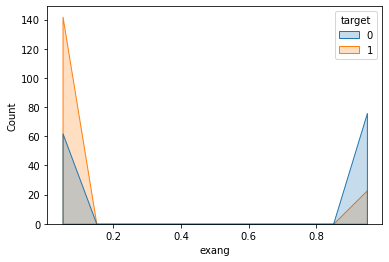

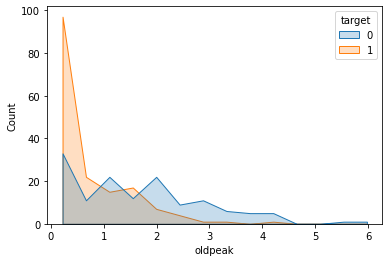

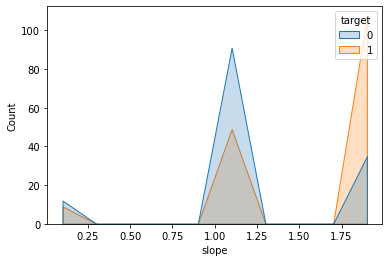

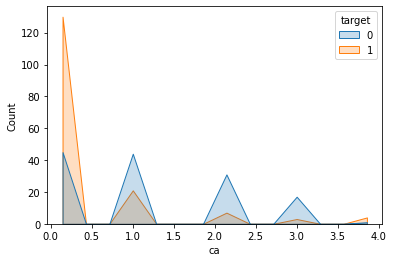

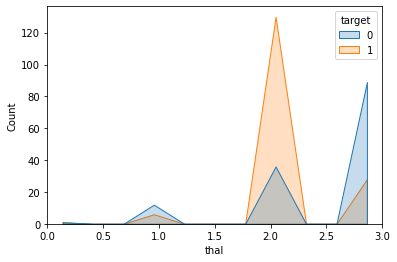

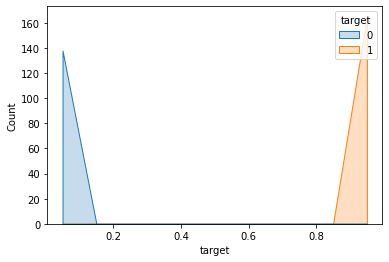

In [14]:
for i in df.columns:
    sns.histplot(x=i, data=df, hue='target', element='poly')
    plt.show()

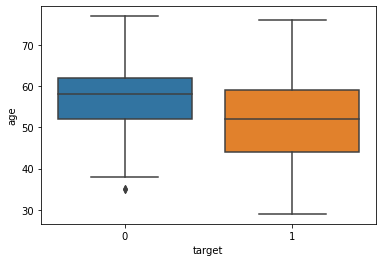

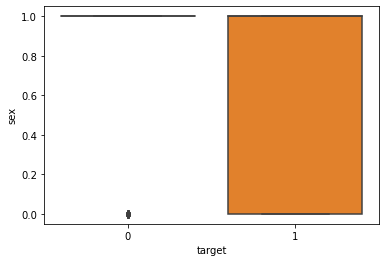

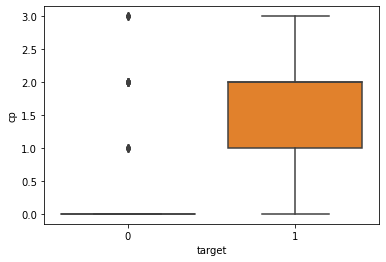

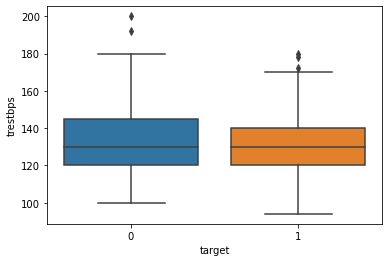

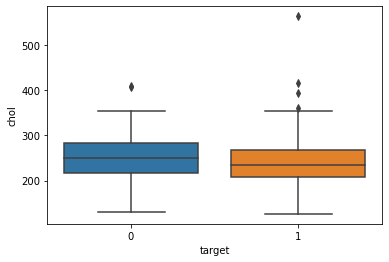

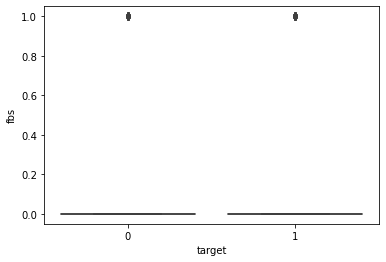

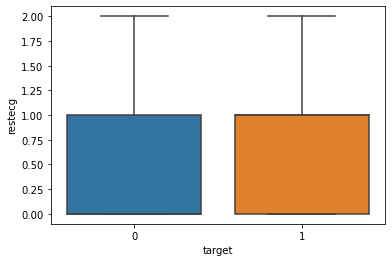

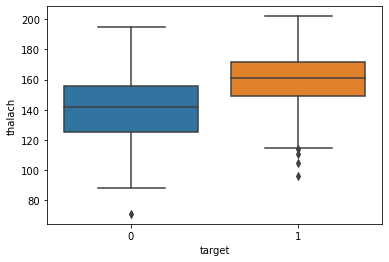

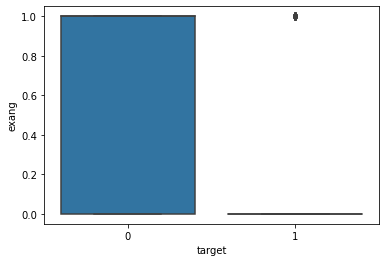

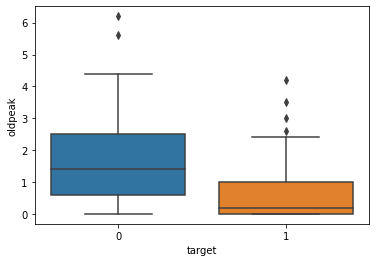

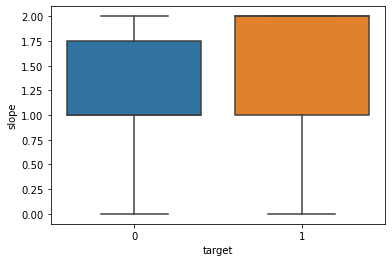

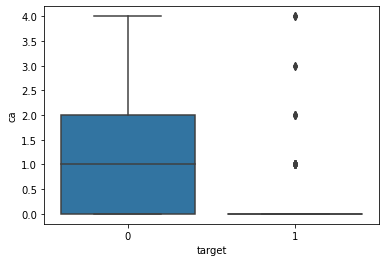

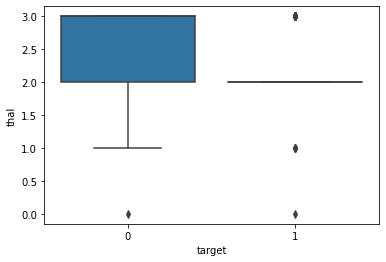

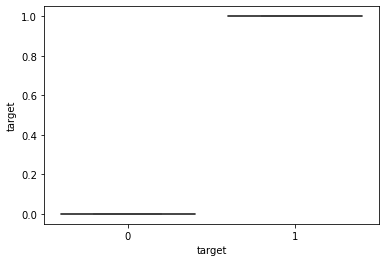

In [13]:
for i in df.columns:
    sns.boxplot(x='target', y=i, data=df)
    plt.show()

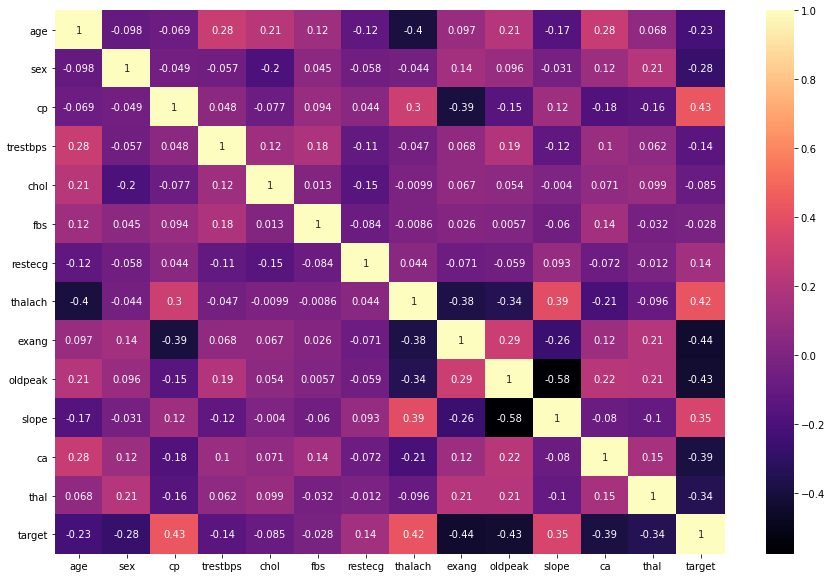

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.show()

### Insights iniciais

- Idade: percentualmente pessoas mais jovens estão sendo detectadas com doenças coronárias  

- Sexo: mulheres possuem uma propensão maior em desenvolver doenças coronárias  

- Nível de dor: pessoas que sentiram dores tem maior chance de ter doenças coronárias  

- Pressão sanguínea: pessoas com pressão sanguínea entre 120 e 140 mmHg tem maiores chances de ter doenças coronárias  

- Colesterol: o colesterol entre 200 e 300 mg/mL possuem proporcionalmente maior propensão a doenças coronárias  

- Rítmo cardíaco: o risco de desenvolver doenças coronárias é diretamente proporcional ao rítmo cardíaco.  

- Exercício físico: pessoas com 0 (provavelmente sedentárias) possuem maior propensão a desenvolver doenças coronárias.  

- Oldpeak: 0 tem maior propensão a doença  

- Slope: slope = 2 possui maior propensão a desenvolver a doença  

- Vassos sanguíneos ressaltados: nenhum vaso tende a ter maior propensão a doença  

- Thal: thal = 2 possui maior propensão a desenvolver a doença  

## Separação em dados de treino e de teste

In [20]:
X = df.drop('target', axis=1)
y = df['target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(242, 13)

In [25]:
X_test.shape

(61, 13)

## Descobrindo o melhor modelo

In [32]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    f1 = round(f1_score(y_teste, previsao, average='macro')*100, 2)
    return f'Modelo: {nome_modelo}\nF1-score:{f1}\n'

In [33]:
modelo_rf = RandomForestClassifier()
modelo_lr = LogisticRegression()
modelo_KNN = KNeighborsClassifier()
modelo_SVM = SVC()

modelos = {'RandomForest': modelo_rf,
          'LogisticRegression': modelo_lr,
          'KNN': modelo_KNN,
          'SVM': modelo_SVM}

for nome_modelo, modelo in modelos.items():
    # treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo,y_test,previsao))

Modelo: RandomForest
F1-score:85.18

Modelo: LogisticRegression
F1-score:88.48

Modelo: KNN
F1-score:68.55

Modelo: SVM
F1-score:69.09



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Avaliação dos modelos

O medelo com maior F1-score foi o de regressão logística, acompanhado pelo RandomForest, que ficaram muito a frente dos demais. Como é o dataset pequeno, será realizado o tuning de hiperparâmetros para os dois modelos com maior desempenho.

## Tuning de hiperparâmetros

### Logistic Regression

In [54]:
param_grid={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
            'C': [1000, 500, 300, 200, 100, 10, 1.0, 0.1, 0.01],
            'fit_intercept': [True, False],
            'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'dual':[True, False],
            'intercept_scaling':[100, 10, 1.0, 0.1, 0.01],
            'max_iter':[10, 50, 100, 150, 200, 500, 1000]}

clf = LogisticRegression()

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 25200 candidates, totalling 75600 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ...        nan 0.73132716 0.6941358 ]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1000, 500, 300, 200, 100, 10, 1.0, 0.1, 0.01],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'intercept_scaling': [100, 10, 1.0, 0.1, 0.01],
                         'max_iter': [10, 50, 100, 150, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [55]:
grid_search.best_params_

{'C': 1000,
 'dual': False,
 'fit_intercept': False,
 'intercept_scaling': 100,
 'max_iter': 50,
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [49]:
clf_best = grid_search.best_estimator_
y_pred = clf_best.predict(X_test)
print(round(f1_score(y_test, y_pred, average='weighted')*100, 2))

88.51


### Random Forest

In [50]:
params_grid = {
    'n_estimators':[50, 100, 150, 200, 250, 500, 1000],
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 1, 2, 3, 4, 5, 10],
    'min_samples_split':[1, 2, 3, 4, 5],
    'max_features':['auto', 'sqrt', 'log2', 2, 3, 4, 5, 8],
    'bootstrap':[True, False]
}

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid=params_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 7840 candidates, totalling 23520 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.75643004 0.75231481 0.75231481]
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2', 2, 3, 4, 5,
                                          8],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250, 500, 1000]},
             verbose=2)

In [51]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [52]:
clf_best = grid_search.best_estimator_
y_pred = clf_best.predict(X_test)
print(round(f1_score(y_test, y_pred, average='weighted')*100, 2))

88.51


## Conclusões

O melhor modelo para este problema foi o de Regressão Logística. Apesar de não ter obtido uma grande melhora após o processo de hiperparametização (passando de 88.48 para 88.51). Já o modelo de Random Forest, após o processo de hiperparametização, obteve o mesmo F1-score do modelo de regressão, passando de 85.18 nos modelos default para 88.51 após o processo de tuning. 

Os melhores parâmetros são:

Logistic Regression  
{'C': 1000,  
 'dual': False,  
 'fit_intercept': False,  
 'intercept_scaling': 100,  
 'max_iter': 50,  
 'penalty': 'l2',  
 'solver': 'lbfgs'}    
 
 
 
Random Forest  
{'bootstrap': True,  
 'criterion': 'gini',  
 'max_depth': 3,  
 'max_features': 2,  
 'min_samples_split': 3,  
 'n_estimators': 100}  